### Baseline

In [1]:
import pandas as pd

from sklearn.model_selection import cross_validate, train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, confusion_matrix, f1_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_directory = "data/train.csv"

train = pd.read_csv(train_directory, header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]

In [3]:
X = train[['age' , 'previous']][:]
y = train['y'][:]

In [4]:
classifier = RandomForestClassifier()

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                                     test_size = 0.2)

In [6]:
classifier.fit(train_data , train_labels)

C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
pred_labels = classifier.predict(test_data)

In [8]:
roc_auc_score(test_labels, pred_labels)

0.5467561466359131

In [9]:
cross_val_score(estimator=classifier, X=X, y=y, cv=5, scoring='roc_auc').mean()

0.6146593037860161

### Решение

### Данные

В задании не представлены обозначения каждой характеристики, поэтому их пришлось искать в интернете. Был найден датасет с полностью совпадающими названиями параметром http://archive.ics.uci.edu/ml/datasets/Bank+Marketing . Он и был взят для обозначения характеристик.

Input variables:
##### bank client data:
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
##### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
##### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
##### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

### Анализ данных

In [10]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

В датасете нет пропущенных значений

In [11]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3222 non-null   int64  
 1   job             3222 non-null   object 
 2   marital         3222 non-null   object 
 3   education       3222 non-null   object 
 4   default         3222 non-null   object 
 5   housing         3222 non-null   object 
 6   loan            3222 non-null   object 
 7   contact         3222 non-null   object 
 8   month           3222 non-null   object 
 9   day_of_week     3222 non-null   object 
 10  duration        3222 non-null   int64  
 11  campaign        3222 non-null   int64  
 12  pdays           3222 non-null   int64  
 13  previous        3222 non-null   int64  
 14  poutcome        3222 non-null   object 
 15  emp.var.rate    3222 non-null   float64
 16  cons.price.idx  3222 non-null   float64
 17  cons.conf.idx   3222 non-null   f

Рассмотрим каждую харатеристику на отношение к целевой переменной

По распределнию возраста можно сказать, что в просроченный платеж в основном выходят пожилые люди и молодые люди до 20 лет

C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


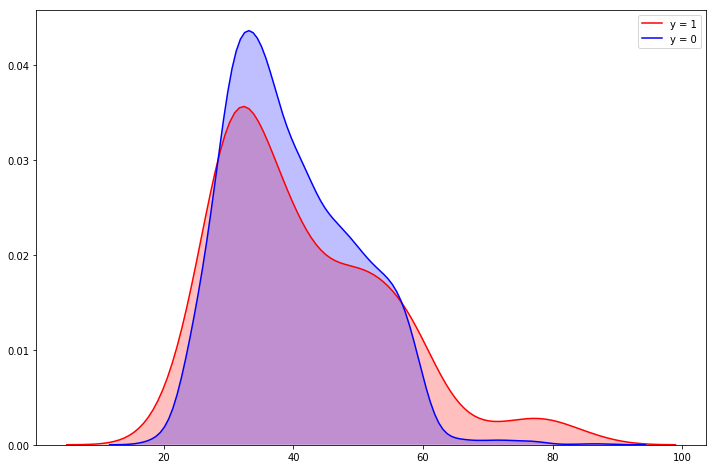

In [14]:
sns.kdeplot(train['age'].loc[train.y == 1], shade=True, color="r", label='y = 1')
sns.kdeplot(train['age'].loc[train.y == 0], shade=True, color="b", label='y = 0')

По типу занятости чаще всего просроченный платеж имеют студенты и пенсионеры (что коррелирует с возрастом), а также безработные. Категория unknown для дальнейшей обработки данных будет занесена в категорию blue-collar, так как имеет наиболее близкий коэффициент выхода в просроченный платеж, а также blue-collar вторая по распространенности категория данного параметра

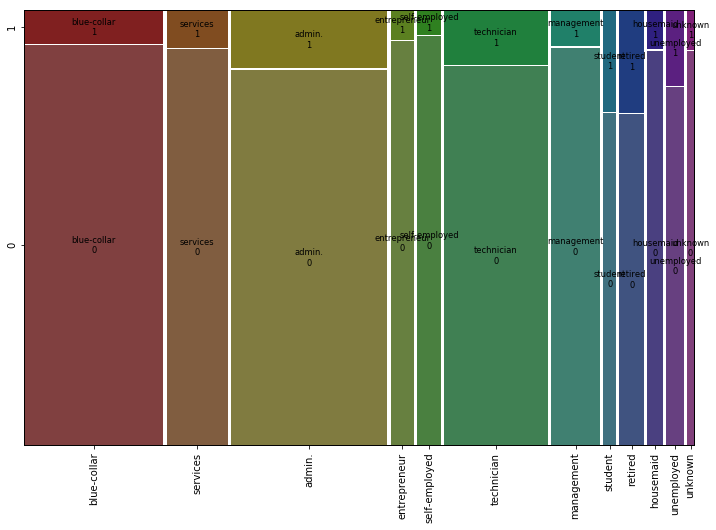

In [15]:
fig = mosaic(train, ['job', 'y'], label_rotation=90)
plt.rcParams["figure.figsize"]=(12, 8)
plt.show()

In [16]:
train.job.value_counts()

admin.           796
blue-collar      707
technician       525
services         309
management       251
retired          127
self-employed    123
entrepreneur     117
unemployed        92
housemaid         78
student           64
unknown           33
Name: job, dtype: int64

In [17]:
train['job'] = ['blue-collar' if i == 'unknown' else i for i in train['job']]

По семейному положению чаще просроченный платеж у холостых/неженатых клиентов. Категория unknown для дальнейшей обработки данных будет занесена в категорию married, так как имеет наиболее близкий коэффициент выхода в просроченный платеж, а также married самая распространенная категория данного параметра

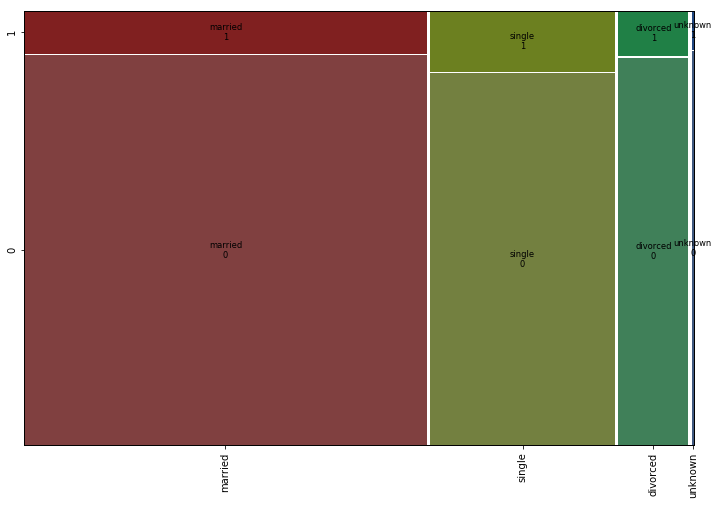

In [18]:
mosaic(train, ['marital', 'y'], label_rotation=90)
plt.show()

In [19]:
train.marital.value_counts()

married     1966
single       904
divorced     341
unknown       11
Name: marital, dtype: int64

In [20]:
train['marital'] = ['married' if i == 'unknown' else i for i in train['marital']]

По образованию чаще просроченный платеж у более образованных клиентов (что странно, на мой взгляд). Категория unknown для дальнейшей обработки данных будет занесена в категорию university.degree, так как имеет наиболее близкий коэффициент выхода в просроченный платеж, а также university.degree самая распространенная категория данного параметра

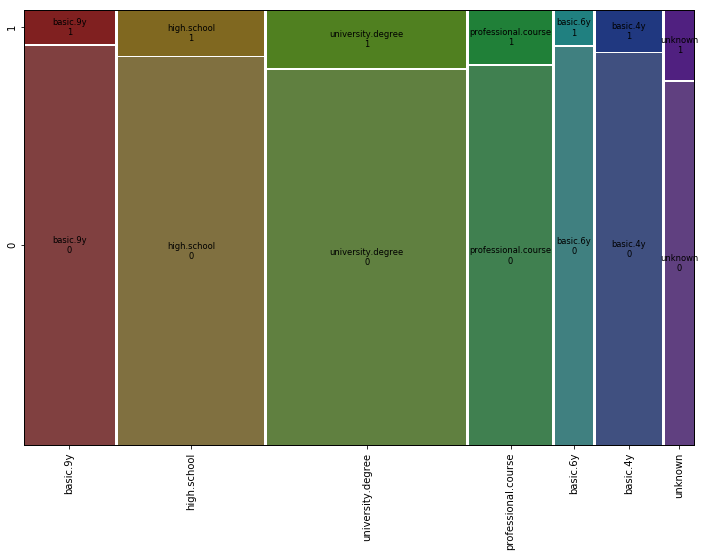

In [21]:
mosaic(train, ['education', 'y'], label_rotation=90)
plt.show()

In [22]:
train.education.value_counts()

university.degree      984
high.school            724
basic.9y               449
professional.course    410
basic.4y               325
basic.6y               187
unknown                143
Name: education, dtype: int64

In [23]:
train['education'] = ['university.degree' if i == 'unknown' else i for i in train['education']]

Параметр default, на мой взгляд, не несет в себе важной информации, так как есть только одна значимая категория *no*. Убираем.

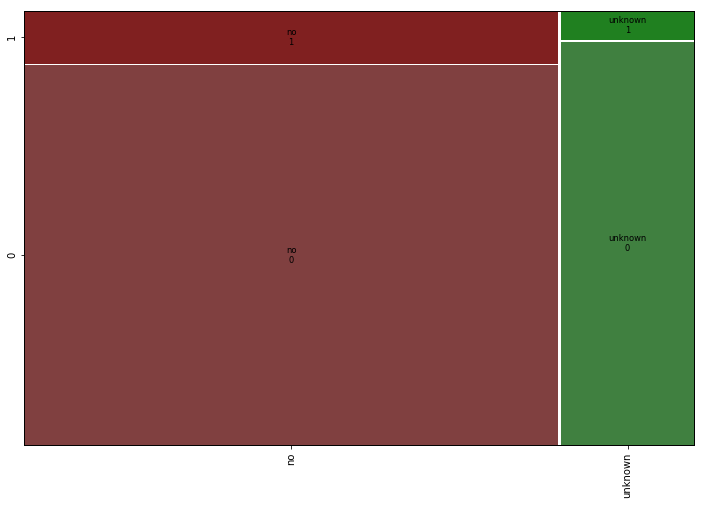

In [24]:
mosaic(train, ['default', 'y'], label_rotation=90)
plt.show()

Для проверки статистической значимости параметров *housing* и *loan* используется критейри Хи-квадрат. По нему p-value намного больше 0,05, что говорит о том, что эти параметры не статистически значимые. В дальнейшем они не будут использованы

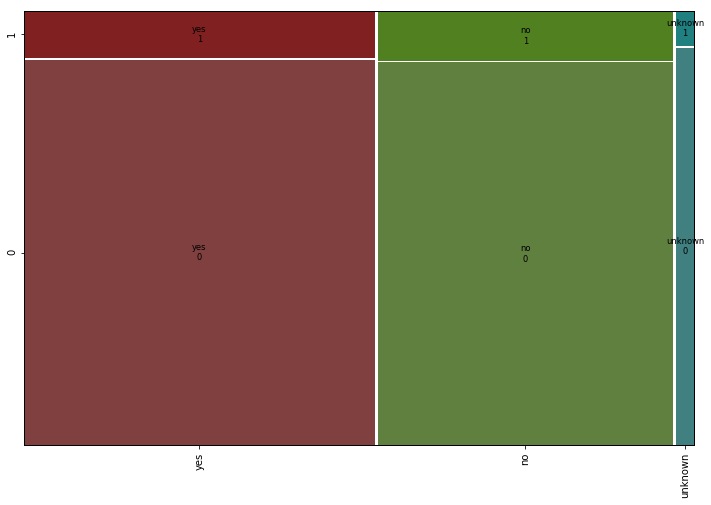

In [25]:
mosaic(train, ['housing', 'y'], label_rotation=90)
plt.show()

In [26]:
cross_tab = pd.crosstab(train['housing'],train['y'],margins = False).drop(['unknown'])
res = chi2_contingency(cross_tab)
print(f'p value: {res[1]}')

p value: 0.6329954518997218


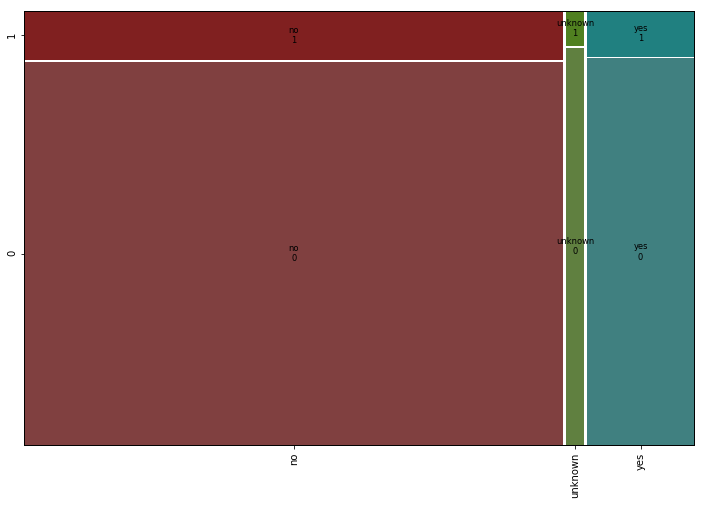

In [27]:
mosaic(train, ['loan', 'y'], label_rotation=90)
plt.show()

In [28]:
cross_tab = pd.crosstab(train['loan'],train['y'],margins = False).drop(['unknown'])
res = chi2_contingency(cross_tab)
print(f'p value: {res[1]}')

p value: 0.6358259315716492


Параметр *contact* является статистически значимым, p-value намного меньше 0,05

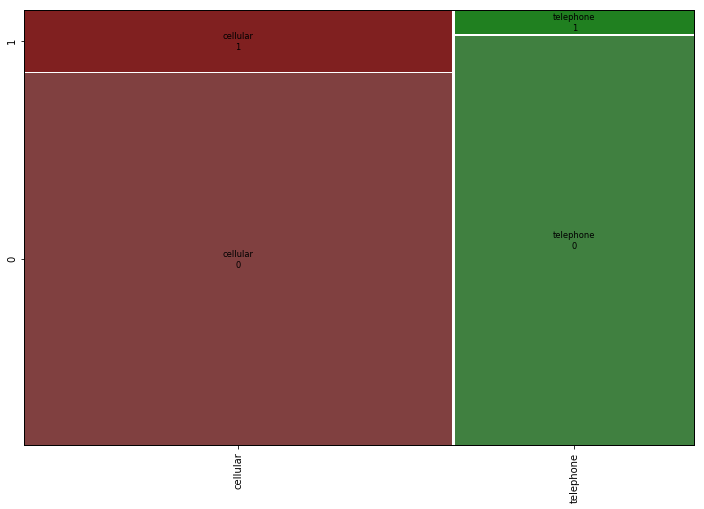

In [29]:
mosaic(train, ['contact', 'y'], label_rotation=90)
plt.show()

In [30]:
cross_tab = pd.crosstab(train['contact'],train['y'],margins = False)
res = chi2_contingency(cross_tab)
print(f'p value: {res[1]}')
#для сравнения p value значимой характеристики

p value: 8.35973495008422e-14


Параметр *month* выглядит довольно интересным. На отношение целевого параметра к всему количеству клиентов в каждом месяце сильно влияет количство самих клиентов. Так, в сентябре или в декабре, где клиентов было намного меньше, чем в мае, наблюдается большое количество выходов в просроченный платеж. Хотя их абсолютное значение не намного отличается от самых наргуженных месяцев

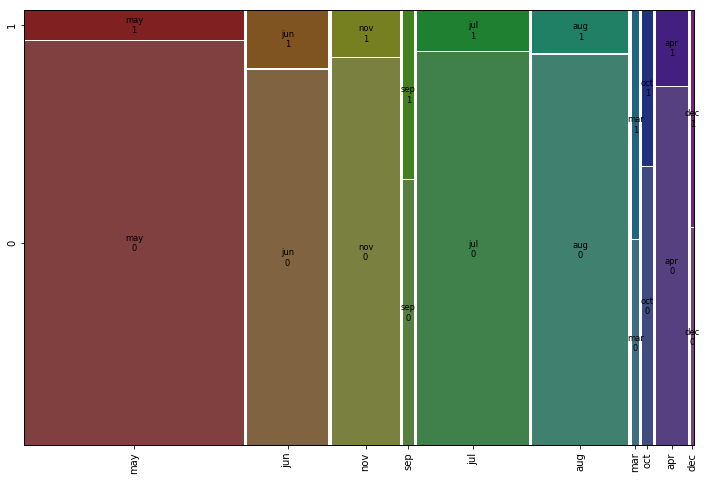

In [31]:
mosaic(train, ['month', 'y'], label_rotation=90)
plt.show()

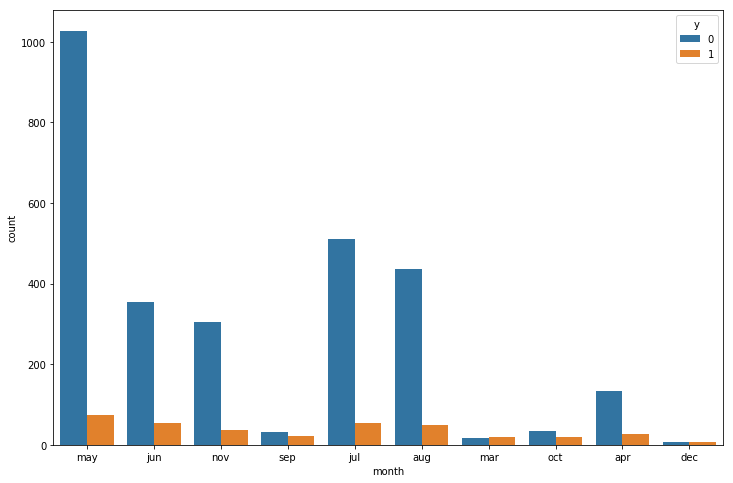

In [32]:
sns.countplot(x="month", hue="y", data=train)

По дням недели видно, что отношение в понедельник просроченных платежов немного увеличенно. Возможно, это связано с тем, что данные с выходных переносятся на первый рабочий день недели.

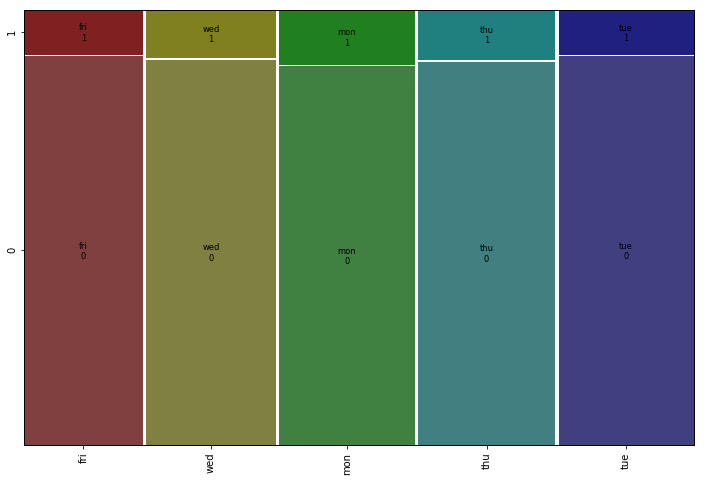

In [33]:
mosaic(train, ['day_of_week', 'y'], label_rotation=90)
plt.show()

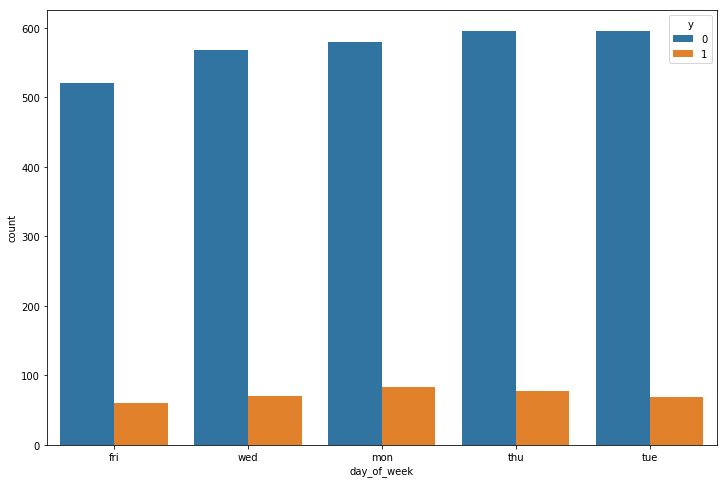

In [34]:
sns.countplot(x="day_of_week", hue="y", data=train)

Показатель *duration* довольно сильно отличается для клиентов с выходом на просроченный платеж и нет. В дальнейшем попробуем его немного преобразовать

C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


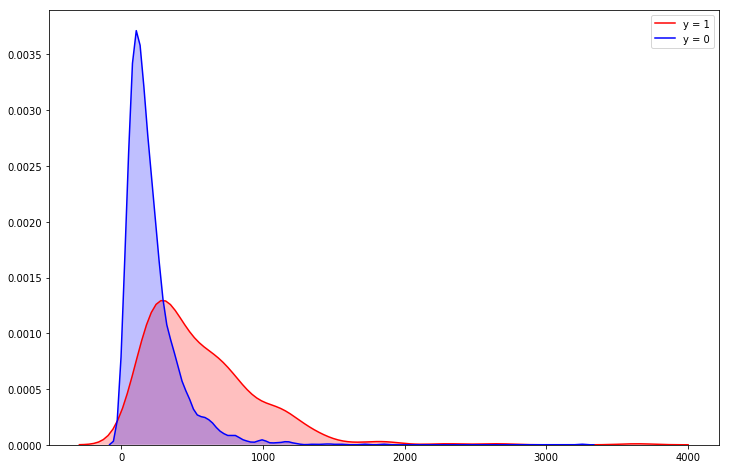

In [35]:
sns.kdeplot(train['duration'].loc[train.y == 1], shade=True, color="r", label='y = 1')
sns.kdeplot(train['duration'].loc[train.y == 0], shade=True, color="b", label='y = 0')

Наблюдается очень высокая корреляция между euribor3m/emp.var.rate , nr.employed/emp.var.rate, nr.employed/euribor3m. Средни них:
*emp.var.rate*: коэффициент изменения занятости - квартальный показатель (числовой)
*euribor3m*: показатель euribor (процентная ставка) за 3 месяца - показатель за день (числовой)
*nr.employed*: число сотрудников - квартальный показатель (числовой)

Полагаю, что число сотрудников и коэффициент изменения занятости по сути одно и тоже. Один из этих параметров можно убрать. 
При вычете emp.var.rate корреляция между двумя другими характеристиками (nr.employed/euribor3m) ниже, поэтому убираем его

In [36]:
corr = train.iloc[:,15:-1].corr()
corr.style.background_gradient(cmap='coolwarm')

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.747513,0.219751,0.969968,0.892328
cons.price.idx,0.747513,1.000000,0.063948,0.645568,0.450870
cons.conf.idx,0.219751,0.063948,1.000000,0.300212,0.130593
euribor3m,0.969968,0.645568,0.300212,1.000000,0.940434
nr.employed,0.892328,0.450870,0.130593,0.940434,1.000000


### Подготовка данных

Убираем из датасета все параметры, которые были указаны ранее.

In [37]:
train = train.drop(['loan', 'housing', 'default', 'emp.var.rate'], axis=1)

Снизим размерность возраста клиентов. Сведем размерность *age* с 67 к 4. Считаю, что значения-выбросы тоже нужно включить в одну из категорий.

In [38]:
print('1Q: ', train['age'].quantile(q = 0.25))
print('2Q: ', train['age'].quantile(q = 0.50))
print('3Q: ', train['age'].quantile(q = 0.75))
print('4Q: ', train['age'].quantile(q = 1.00))

print('Выбросы от', train['age'].quantile(q = 0.75) + 
                      1.5*(train['age'].quantile(q = 0.75) - train['age'].quantile(q = 0.25)))

1Q:  32.0
2Q:  38.0
3Q:  47.0
4Q:  88.0
Выбросы от 69.5


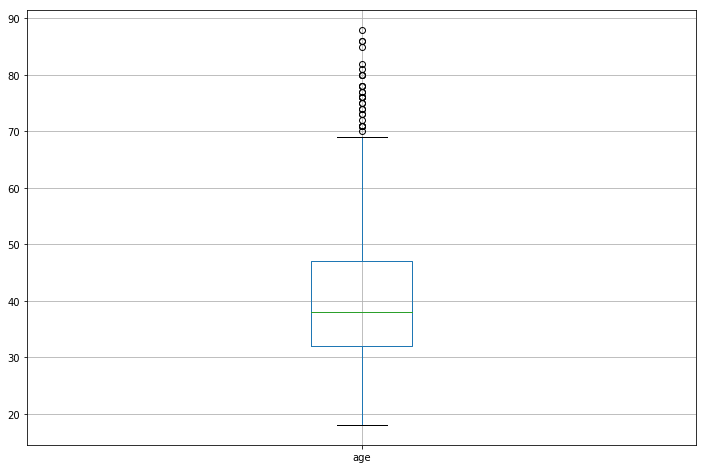

In [39]:
train.boxplot(column=['age'])

In [40]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 38), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 38) & (dataframe['age'] <= 47), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 88), 'age'] = 4
           
    return dataframe

age(train);

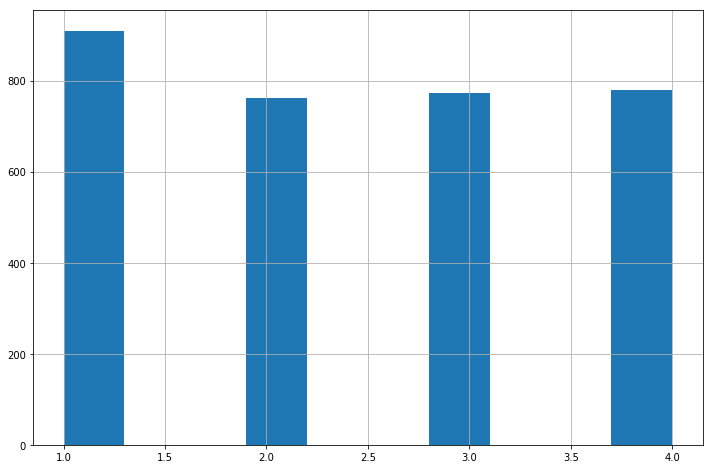

In [41]:
train['age'].hist()

Значения *contact* меняем с object на бинарные.

In [42]:
train['contact'] = [1 if contact == 'cellular' else 0 for contact in train['contact']]

Проводим операцию снижения размерности с *duration*, *euribor3m*.

In [43]:
print("Max duration  call in minutes:  ", round((train['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((train['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((train['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((train['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   60.7
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.2
STD duration  call in minutes:    4.2


In [44]:
print('1Q: ', train['duration'].quantile(q = 0.25))
print('2Q: ', train['duration'].quantile(q = 0.50))
print('3Q: ', train['duration'].quantile(q = 0.75))
print('4Q: ', train['duration'].quantile(q = 1.00))
    
print('Выбросы от: ', train['duration'].quantile(q = 0.75) + 
                      1.5*(train['duration'].quantile(q = 0.75) - train['duration'].quantile(q = 0.25)))

1Q:  102.0
2Q:  181.0
3Q:  314.0
4Q:  3643.0
Выбросы от:  632.0


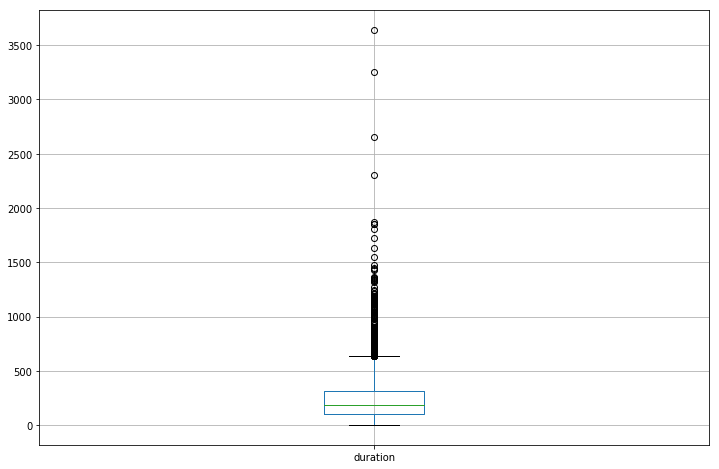

In [45]:
train.boxplot(column=['duration'])

In [46]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 181)  , 'duration']    = 2
    data.loc[(data['duration'] > 181) & (data['duration'] <= 314)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 632), 'duration'] = 4
    data.loc[data['duration']  > 632, 'duration'] = 5

    return data
duration(train);

In [47]:
print('1Q: ', train['euribor3m'].quantile(q = 0.25))
print('2Q: ', train['euribor3m'].quantile(q = 0.50))
print('3Q: ', train['euribor3m'].quantile(q = 0.75))
print('4Q: ', train['euribor3m'].quantile(q = 1.00))
    
print('Выбросы от: ', train['euribor3m'].quantile(q = 0.75) + 
                      1.5*(train['euribor3m'].quantile(q = 0.75) - train['euribor3m'].quantile(q = 0.25)))

1Q:  1.334
2Q:  4.857
3Q:  4.961
4Q:  5.045
Выбросы от:  10.4015


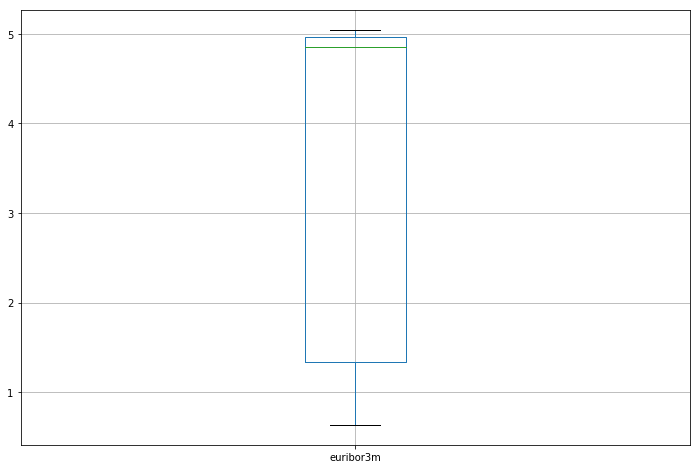

In [48]:
train.boxplot(column=['euribor3m'])

In [49]:
def euribor3m(data):
    data.loc[data['euribor3m'] <= 1.334, 'euribor3m'] = 1
    data.loc[(data['euribor3m'] > 1.334) & (data['euribor3m'] <= 4.857)  , 'euribor3m']    = 2
    data.loc[(data['euribor3m'] > 4.857) & (data['euribor3m'] <= 4.961)  , 'euribor3m']   = 3
    data.loc[(data['euribor3m'] > 4.961) & (data['euribor3m'] <= 5.045), 'euribor3m'] = 4

    return data
euribor3m(train);

In [50]:
train_1 = pd.get_dummies(train)

In [51]:
train_1.columns

Index(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [52]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            3222 non-null   int64  
 1   contact                        3222 non-null   int64  
 2   duration                       3222 non-null   int64  
 3   campaign                       3222 non-null   int64  
 4   pdays                          3222 non-null   int64  
 5   previous                       3222 non-null   int64  
 6   cons.price.idx                 3222 non-null   float64
 7   cons.conf.idx                  3222 non-null   float64
 8   euribor3m                      3222 non-null   float64
 9   nr.employed                    3222 non-null   float64
 10  y                              3222 non-null   int64  
 11  job_admin.                     3222 non-null   uint8  
 12  job_blue-collar                3222 non-null   u

### Модель

Рассмотрим несколько классфикаторов и посмотрим какой лучше подойдет.

In [53]:
X = train_1.drop(['y'], axis=1)
y = train_1.y

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#### Логистическая регрессия

In [56]:

logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=cv, n_jobs=1, scoring = 'roc_auc').mean())
print(LOGCV)

[[568   4]
 [ 57  16]]
0.7402273753952717


C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

#### KNN

In [59]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, y, test_size = 0.2, random_state = 101)

neighbors = np.arange(0,25)

cv_scores = []

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = cross_val_score(knn, X_trainK, y_trainK, cv=cv, scoring = 'roc_auc')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]

k=1 69.14 (+/- 3.39)
k=2 75.77 (+/- 1.82)
k=3 79.32 (+/- 2.75)
k=4 81.12 (+/- 3.00)
k=5 82.70 (+/- 3.06)
k=6 83.55 (+/- 2.34)
k=7 84.26 (+/- 1.94)
k=8 84.76 (+/- 2.26)
k=9 84.86 (+/- 2.31)
k=10 85.11 (+/- 2.17)
k=11 86.19 (+/- 2.36)
k=12 86.15 (+/- 2.10)
k=13 86.39 (+/- 1.95)
k=14 86.92 (+/- 1.95)
k=15 87.06 (+/- 2.03)
k=16 87.09 (+/- 1.75)
k=17 87.26 (+/- 1.88)
k=18 87.61 (+/- 2.32)
k=19 87.56 (+/- 2.05)
k=20 87.51 (+/- 2.21)
k=21 87.49 (+/- 1.83)
k=22 87.40 (+/- 2.02)
k=23 87.68 (+/- 2.21)
k=24 87.51 (+/- 2.00)
k=25 87.36 (+/- 1.97)


In [60]:

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
KNNCV = (cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=1, scoring = 'roc_auc').mean())
print(KNNCV)

[[570   2]
 [ 58  15]]
0.8927157054660443


#### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=cv, n_jobs=1, scoring = 'roc_auc').mean())
print(DTREECV)

[[540  32]
 [ 34  39]]
0.7079694323144105


####  RFC

In [62]:

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=cv, n_jobs=1, scoring = 'roc_auc').mean())
print(RFCCV)

[[563   9]
 [ 47  26]]
0.9082141243788587


#### GaussianNB

In [63]:

gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=cv, n_jobs=1, scoring = 'roc_auc').mean())
print(GAUSIAN)

[[529  43]
 [ 40  33]]
0.719052100587261


#### XGBClassifier

In [64]:

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = cv, scoring = 'roc_auc').mean())
print(XGB)

[[546  26]
 [ 40  33]]
0.9135672338503238


#### GradientBoostingClassifier

In [65]:

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=cv, n_jobs=1, scoring = 'roc_auc').mean())
print(GBKCV)

[[559  13]
 [ 40  33]]
0.9332931787381418


In [66]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
6,Gradient Boosting,0.933293
5,XGBoost,0.913567
0,Random Forest Classifier,0.908214
2,K-Near Neighbors,0.892716
3,Logistic Model,0.740227
4,Gausian NB,0.719052
1,Decision Tree Classifier,0.707969


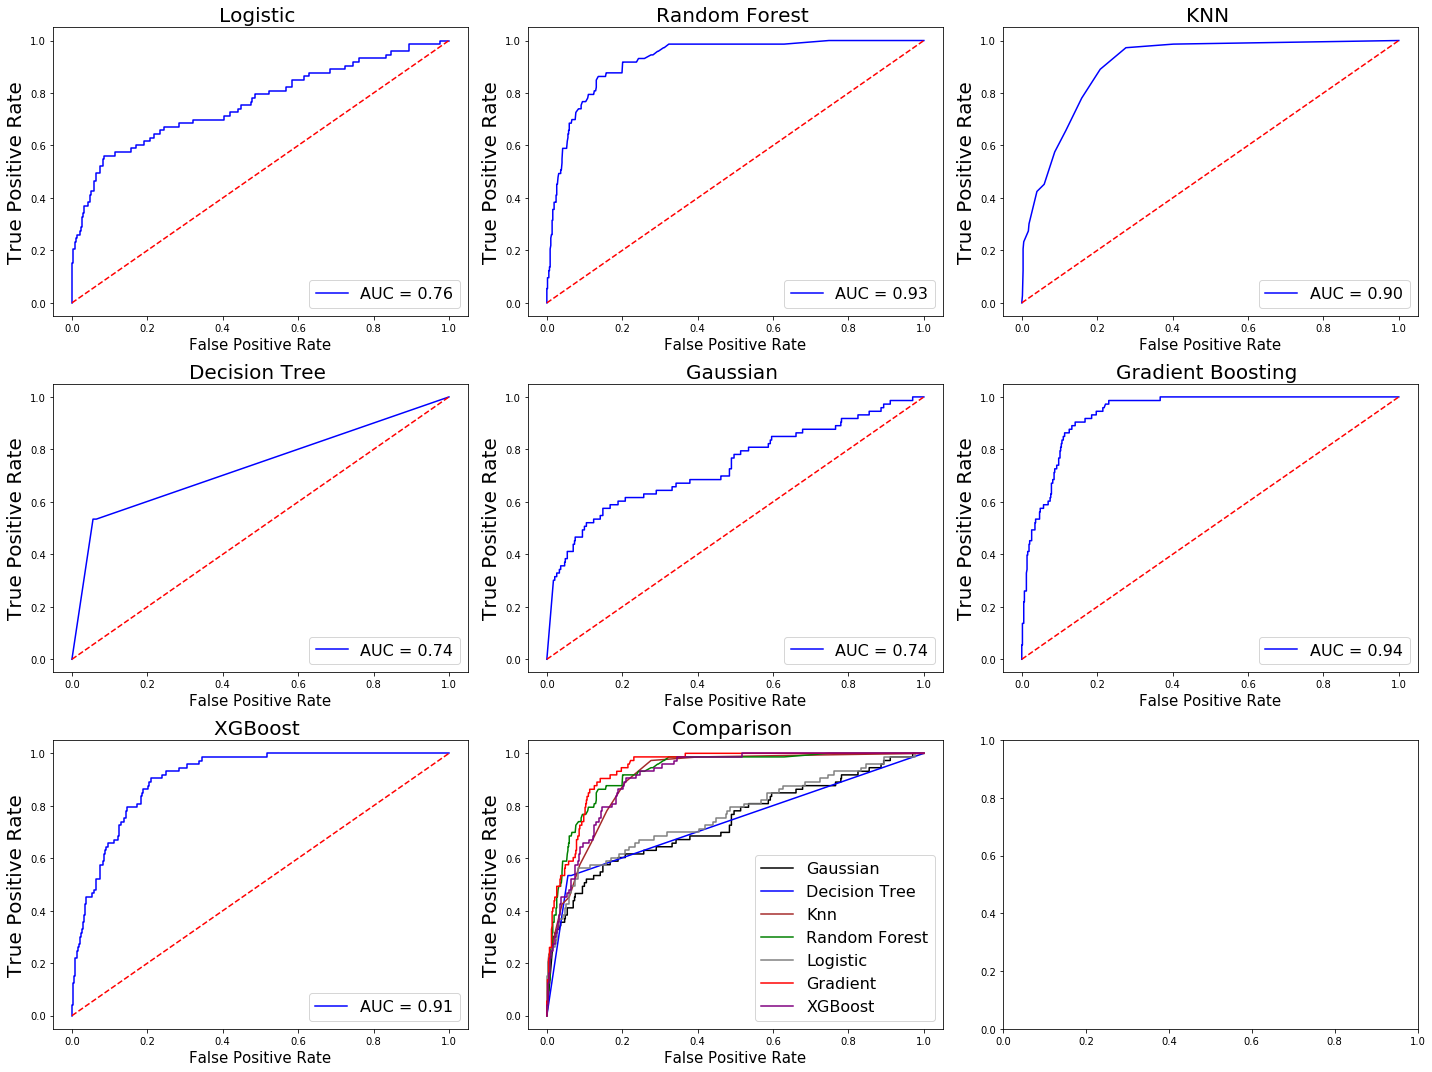

In [67]:
fig, ax_arr = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))

#Logistic Model --------------------
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = roc_curve(y_test, preds)
roc_auclog = auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#Random Forest Classifier --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = roc_curve(y_test, preds)
roc_aucrfc = auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = roc_curve(y_test, preds)
roc_aucknn = auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#Decision Tree Classifier ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = roc_curve(y_test, preds)
roc_aucdtree = auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#Gausian NB ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = roc_curve(y_test, preds)
roc_aucgau = auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#Gradient Boosting ------------------------
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = roc_curve(y_test, preds)
roc_aucgbk = auc(fprgbk, tprgbk)

ax_arr[1,2].plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('Gradient Boosting ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

#XGBoost ------------------------
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = roc_curve(y_test, preds)
roc_aucxgb = auc(fprxgb, tprxgb)

ax_arr[2,0].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[2,0].plot([0, 1], [0, 1],'r--')
ax_arr[2,0].set_title('XGBoost ',fontsize=20)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,0].legend(loc = 'lower right', prop={'size': 16})

#All plots ----------------------------------
ax_arr[2,1].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[2,1].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[2,1].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[2,1].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[2,1].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[2,1].plot(fprgbk, tprgbk, 'b', label = 'Gradient', color='red')
ax_arr[2,1].plot(fprxgb, tprxgb, 'b', label = 'XGBoost', color='purple')
ax_arr[2,1].set_title('Comparison ',fontsize=20)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,1].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

Как видно из данных выше, наилучший roc auc на кросс-валидации дал **gradient boosting** с результатом 0.933293.

### Комментарий

Для улучшения качества модели я бы сделал следующие действия:
1. Получше рассмотрел следующие параметры: *duration*, *euribor3m*, *emp.var.rate*, *nr.employed*
2. Выделение дополнительных признаков
3. Настройка глобальных параметров классификаторов с помощью GridSearch
4. Оценка работы классификатора по точности, полноте и F-мере.